# Building Neural Network

## Binary Classification

In [2]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow.keras.datasets import imdb # Movie review classification

In [3]:
# Load data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# Dataset information
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: (25000,)
Test data shape: (25000,)


In [4]:
# Data preview
print(f"First data: {train_data[0]}\n")
print(f"First label: {train_labels[0]}")

First data: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

First label: 1


In [5]:
# Double check if the words are the top 10000
max([max(sequence) for sequence in train_data])

9999

In [6]:
# Change numbers back to words
word_index = imdb.get_word_index()

In [7]:
# See how the dict are made
for i in word_index.items():
    print(i)
    break

('fawn', 34701)


In [8]:
# Change the key-value order
reverse_word_index = {value: key for key, value in word_index.items()}

In [9]:
# See how the dict are made
for i in reverse_word_index.items():
    print(i)
    break

(34701, 'fawn')


In [10]:
reverse_word_index.get(34701 - 3, '?')

'footwork'

In [11]:
# Reverse the first data preview
decoded_first = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # Since the dataset keep 0, 1, 2 for specific purpose, so i - 3 is needed to get the corresponding word
print(f"First data: {decoded_first}\n")
print(f"First label: {train_labels[0]}")

First data: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done d

### Data preparation

In [12]:
for idx, item in enumerate(train_data):
    if idx == 10:
        break
    print(f"Review {idx} - length {len(item)}")

Review 0 - length 218
Review 1 - length 189
Review 2 - length 141
Review 3 - length 550
Review 4 - length 147
Review 5 - length 43
Review 6 - length 123
Review 7 - length 562
Review 8 - length 233
Review 9 - length 130


In [14]:
# Since each review is in different length, we need to make them the same length 
# so that the neural network is able to handle the input dataset

# Apply one-hot encoding to the dataset
def verctorize_sequence(sequences, dimension=10000):
    # Zeros vectors
    results = np.zeros((len(sequences), dimension))
    # Set corresponding word as 1 if the sequence has it
    for idx, sequence in enumerate(sequences):
        results[idx, sequence] = 1.
    return results

x_train = verctorize_sequence(train_data)
x_test = verctorize_sequence(test_data)
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (25000, 10000)
Test data shape: (25000, 10000)


In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
# Check again
for idx, item in enumerate(x_train):
    if idx == 10:
        break
    print(f"Review {idx} - length {len(item)}")

Review 0 - length 10000
Review 1 - length 10000
Review 2 - length 10000
Review 3 - length 10000
Review 4 - length 10000
Review 5 - length 10000
Review 6 - length 10000
Review 7 - length 10000
Review 8 - length 10000
Review 9 - length 10000


In [18]:
# Transform the labels as vectors
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Model Training

#### Define the model

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
# Model structure
model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [25]:
# Compile the model
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

#### Training

In [26]:
# Spilt the validation set
val_num = 10000
x_val = x_train[:val_num]
partial_x_train = x_train[val_num:]
y_val = y_train[:val_num]
partial_y_train = y_train[val_num:]

In [27]:
# Training
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Epoch 1/20


2023-11-25 08:51:35.397809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.4961 - accuracy: 0.7877

2023-11-25 08:51:37.464748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 3s 57ms/step - loss: 0.4961 - accuracy: 0.7877 - val_loss: 0.4096 - val_accuracy: 0.8269
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3049 - accuracy: 0.8995 - val_loss: 0.3101 - val_accuracy: 0.8844
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2285 - accuracy: 0.9257 - val_loss: 0.3074 - val_accuracy: 0.8742
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1789 - accuracy: 0.9421 - val_loss: 0.2755 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1487 - accuracy: 0.9550 - val_loss: 0.2908 - val_accuracy: 0.8828
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1228 - accuracy: 0.9623 - val_loss: 0.2979 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1016 - accuracy: 0.9719 - val_loss: 0.3896 - val_accuracy: 0.8641
Epoch 8/20
30/30 [======

#### Evaluation

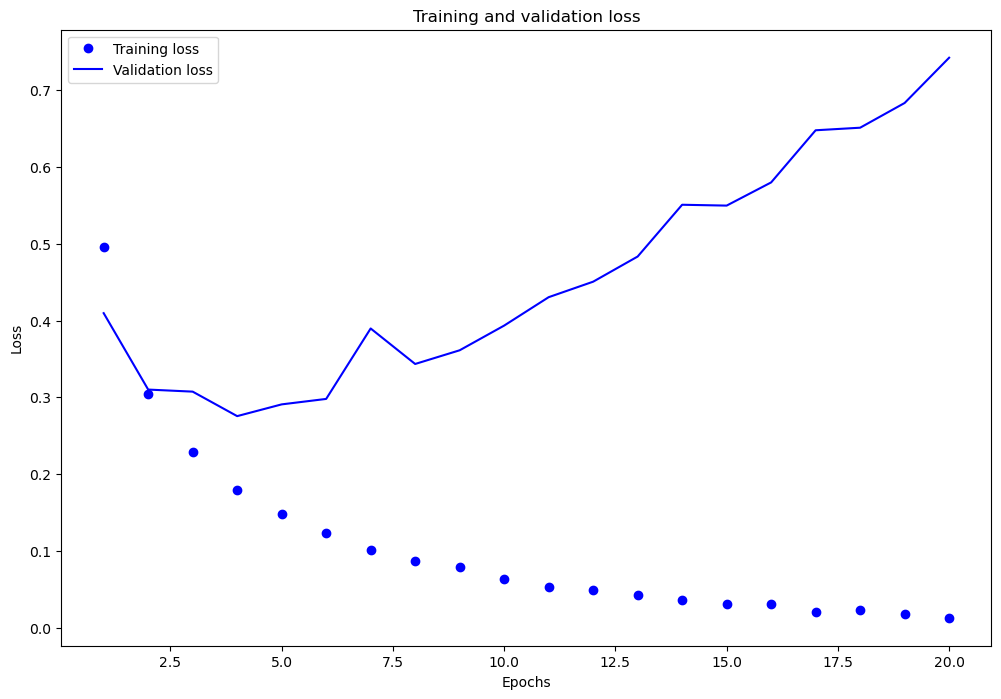

In [ ]:
history_dict = history.history

# Get loss values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
# Plot
epochs = [i+1 for i in range(20)] # X label
fix, ax = plt.subplots(figsize = (12, 8))
ax.plot(epochs, loss_values, 'bo', label = 'Training loss')
ax.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax.set_title('Training and validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend();


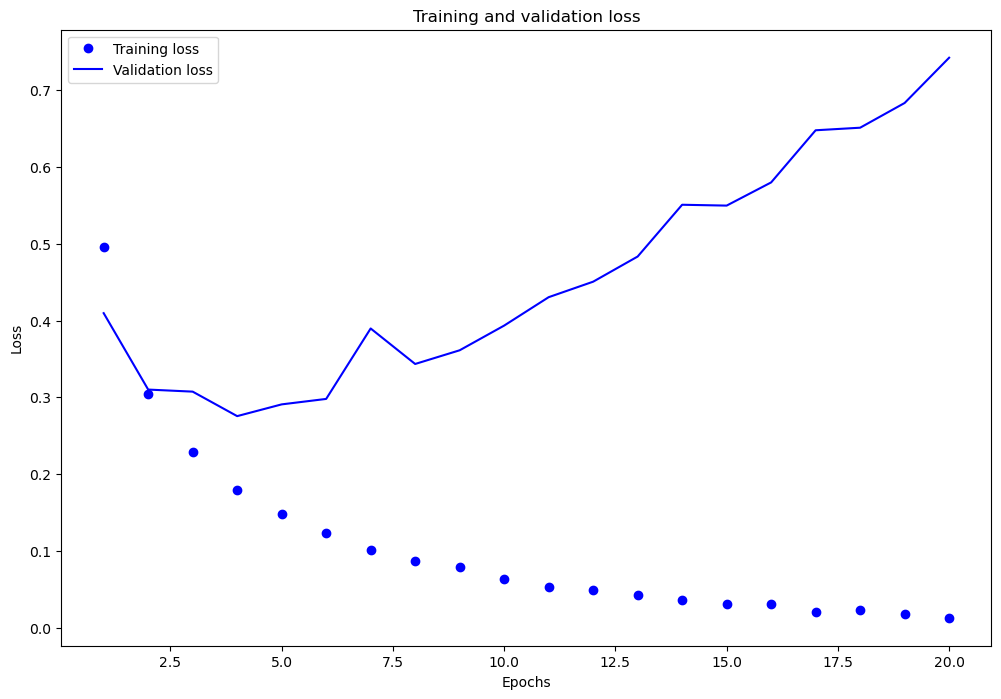

In [ ]:
# Get loss values
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
# Plot
epochs = [i+1 for i in range(20)] # X label
fix, ax = plt.subplots(figsize = (12, 8))
ax.plot(epochs, acc_values, 'bo', label = 'Training acc')
ax.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
ax.set_title('Training and validation accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend();

## Multi Class Classification

In [30]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
# Dataset
from tensorflow.keras.datasets import reuters # Movie review classification

### EDA

In [2]:
# Load data
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
# Dataset information
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

2110848/2110848 [==============================] - 0s 0us/step
Training data shape: (8982,)
Test data shape: (2246,)


In [3]:
# Data preview
print(f"First data: {train_data[0]}\n")
print(f"First label: {train_labels[0]}")

First data: [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]

First label: 3


In [4]:
# Double check if the words are the top 10000
max([max(sequence) for sequence in train_data])

9999

In [77]:
# Exploe training labels
label_count = {key: 0 for key in range(46)}
for i in train_labels:
    label_count[i] += 1

In [60]:
label_count.values()

dict_values([55, 432, 74, 3159, 1949, 17, 48, 16, 139, 101, 124, 390, 49, 172, 26, 20, 444, 39, 66, 549, 269, 100, 15, 41, 62, 92, 24, 15, 48, 19, 45, 39, 32, 11, 50, 10, 49, 19, 19, 24, 36, 30, 13, 21, 12, 18])

<BarContainer object of 46 artists>

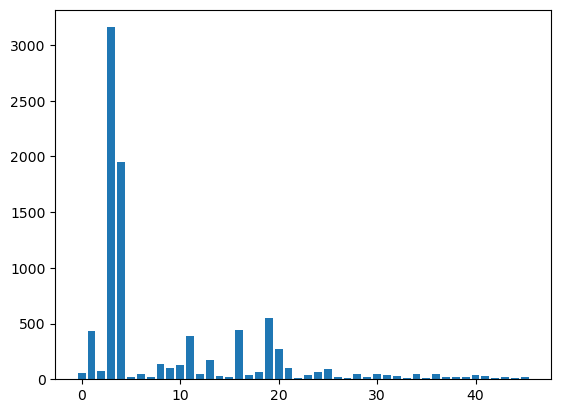

In [78]:
# See how each news topics in the dataset distributed
# import seaborn as sns
plt.bar(range(46), label_count.values())

In [5]:
# Change numbers back to words
word_index = reuters.get_word_index()

550378/550378 [==============================] - 0s 0us/step


In [6]:
# See how the dict are made
for i in word_index.items():
    print(i)
    break

('mdbl', 10996)


In [7]:
# Change the key-value order
reverse_word_index = {value: key for key, value in word_index.items()}

In [8]:
# See how the dict are made
for i in reverse_word_index.items():
    print(i)
    break

(10996, 'mdbl')


In [9]:
# Reverse the first data preview
decoded_first = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # Since the dataset keep 0, 1, 2 for specific purpose, so i - 3 is needed to get the corresponding word
print(f"First data: {decoded_first}\n")
print(f"First label: {train_labels[0]}")

First data: ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3

First label: 3


### Data preparation

In [11]:
for idx, item in enumerate(train_data):
    if idx == 10:
        break
    print(f"Review {idx} - length {len(item)}")

Review 0 - length 87
Review 1 - length 56
Review 2 - length 139
Review 3 - length 224
Review 4 - length 101
Review 5 - length 116
Review 6 - length 100
Review 7 - length 100
Review 8 - length 82
Review 9 - length 106


In [13]:
# Since each review is in different length, we need to make them the same length 
# so that the neural network is able to handle the input dataset
import numpy as np
# Apply one-hot encoding to the dataset
def verctorize_sequence(sequences, dimension=10000):
    # Zeros vectors
    results = np.zeros((len(sequences), dimension))
    # Set corresponding word as 1 if the sequence has it
    for idx, sequence in enumerate(sequences):
        results[idx, sequence] = 1.
    return results

x_train = verctorize_sequence(train_data)
x_test = verctorize_sequence(test_data)
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (8982, 10000)
Test data shape: (2246, 10000)


In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
# Check again
for idx, item in enumerate(x_train):
    if idx == 10:
        break
    print(f"Review {idx} - length {len(item)}")

Review 0 - length 10000
Review 1 - length 10000
Review 2 - length 10000
Review 3 - length 10000
Review 4 - length 10000
Review 5 - length 10000
Review 6 - length 10000
Review 7 - length 10000
Review 8 - length 10000
Review 9 - length 10000


In [22]:
# Transform the labels using categorical encoding - one-hot

# Method one
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for idx, label in enumerate(labels):
        results[idx, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

# Method two - Keras built-in functions
from tensorflow.keras.utils import to_categorical()
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
# Transform the labels using categorical encoding - target

from category_encoders import TargetEncoder

encoder = TargetEncoder()

encoder.fit(x_train, y_train)
X_cleaned = encoder.transform(x_train)


### Model Training

#### Define the model

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

In [26]:
# Model structure
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

In [27]:
# Compile the model
model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

#### Training

In [23]:
# Spilt the validation set
val_num = 1000
x_val = x_train[:val_num]
partial_x_train = x_train[val_num:]
y_val = y_train[:val_num]
partial_y_train = y_train[val_num:]

In [28]:
# Training
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Epoch 1/20


2023-11-26 15:17:03.270254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 2s 60ms/step - loss: 2.2241 - accuracy: 0.5228 - val_loss: 1.5709 - val_accuracy: 0.6180
Epoch 2/20
 4/16 [======>.......................] - ETA: 0s - loss: 1.3378 - accuracy: 0.6904

2023-11-26 15:17:05.300736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 19ms/step - loss: 1.2661 - accuracy: 0.7081 - val_loss: 1.2139 - val_accuracy: 0.7300
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 0.9513 - accuracy: 0.7821 - val_loss: 1.0997 - val_accuracy: 0.7670
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.7379 - accuracy: 0.8340 - val_loss: 0.9925 - val_accuracy: 0.8030
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5544 - accuracy: 0.8800 - val_loss: 1.0275 - val_accuracy: 0.7820
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.4300 - accuracy: 0.9059 - val_loss: 0.9721 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.3402 - accuracy: 0.9251 - val_loss: 1.0588 - val_accuracy: 0.7760
Epoch 8/20
16/16 [==============================] - 0s 19ms/step - loss: 0.2618 - accuracy: 0.9420 - val_loss: 0.9994 - val_accuracy: 0.8100
Epoch 9/20
16/16 [======

#### Evaluation

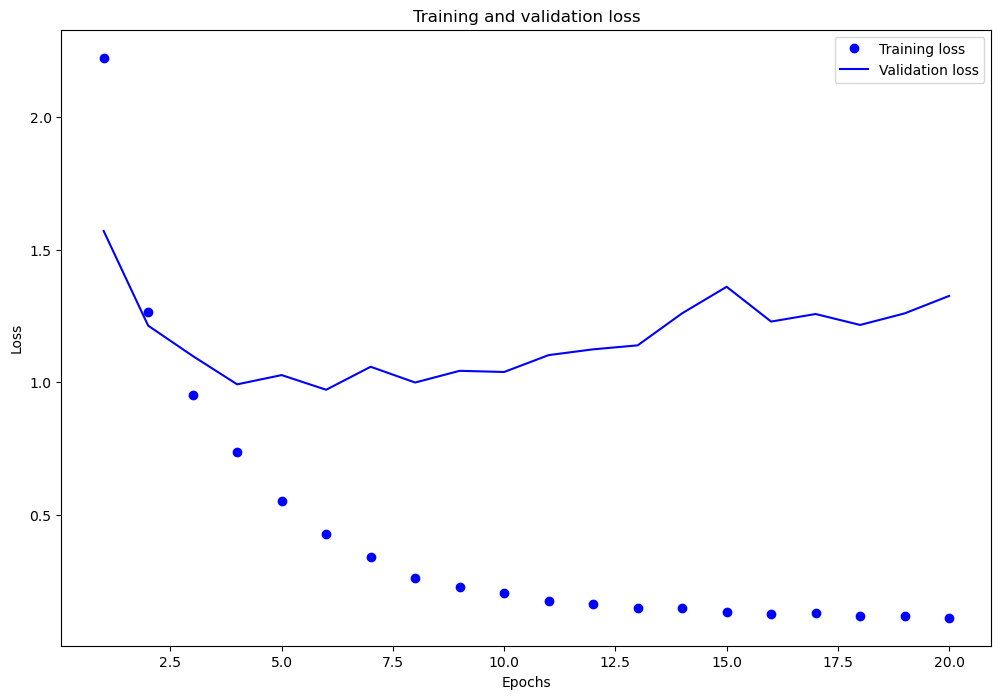

In [31]:
history_dict = history.history

# Get loss values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
# Plot
epochs = [i+1 for i in range(20)] # X label
fix, ax = plt.subplots(figsize = (12, 8))
ax.plot(epochs, loss_values, 'bo', label = 'Training loss')
ax.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax.set_title('Training and validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend();


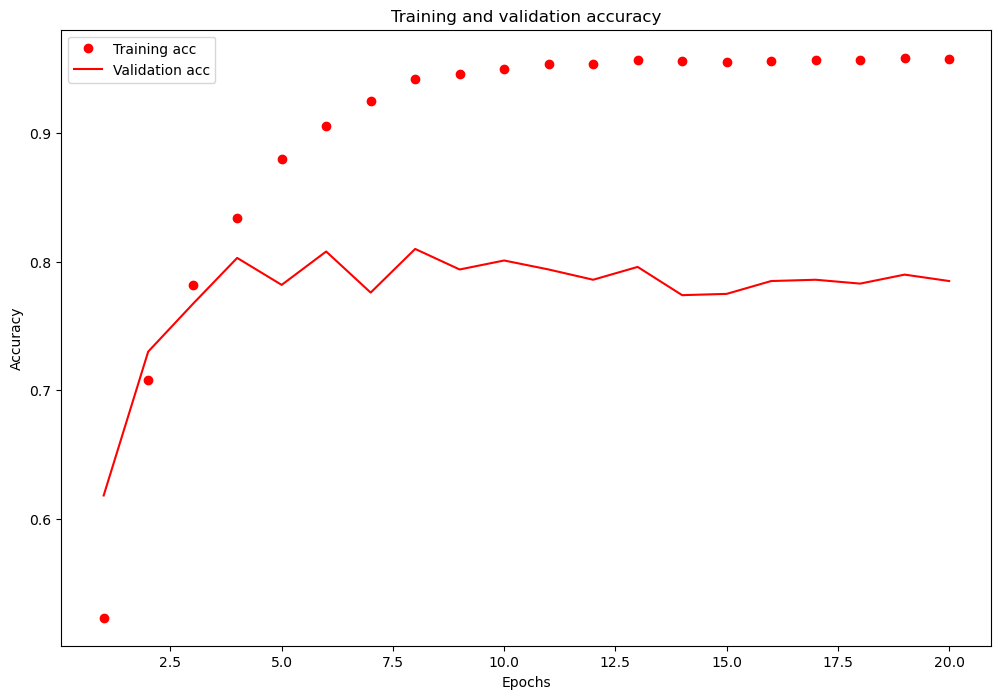

In [35]:
# Get loss values
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
# Plot
epochs = [i+1 for i in range(20)] # X label
fix, ax = plt.subplots(figsize = (12, 8))
ax.plot(epochs, acc_values, 'ro', label = 'Training acc')
ax.plot(epochs, val_acc_values, 'r', label = 'Validation acc')
ax.set_title('Training and validation accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend();

* From the plot, we can see that there seem to be overfitting after the eighth epoch. Thus, we can train the model again and set the epoch as 8 to make it more general.

In [98]:
# Model structure
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    # layers.Dense(256, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

In [99]:
# Compile the model
model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [100]:
# Training
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 6,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Epoch 1/6


2023-11-26 16:06:05.305270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 30ms/step - loss: 2.3009 - accuracy: 0.5613 - val_loss: 1.5069 - val_accuracy: 0.6660
Epoch 2/6
 5/16 [========>.....................] - ETA: 0s - loss: 1.3737 - accuracy: 0.7082

2023-11-26 16:06:05.916717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 18ms/step - loss: 1.2633 - accuracy: 0.7301 - val_loss: 1.2160 - val_accuracy: 0.7220
Epoch 3/6
16/16 [==============================] - 0s 18ms/step - loss: 0.9418 - accuracy: 0.7968 - val_loss: 1.0784 - val_accuracy: 0.7630
Epoch 4/6
16/16 [==============================] - 0s 17ms/step - loss: 0.7337 - accuracy: 0.8472 - val_loss: 0.9608 - val_accuracy: 0.8080
Epoch 5/6
16/16 [==============================] - 0s 17ms/step - loss: 0.5755 - accuracy: 0.8811 - val_loss: 0.9240 - val_accuracy: 0.8110
Epoch 6/6
16/16 [==============================] - 0s 17ms/step - loss: 0.4571 - accuracy: 0.9057 - val_loss: 0.9162 - val_accuracy: 0.8030


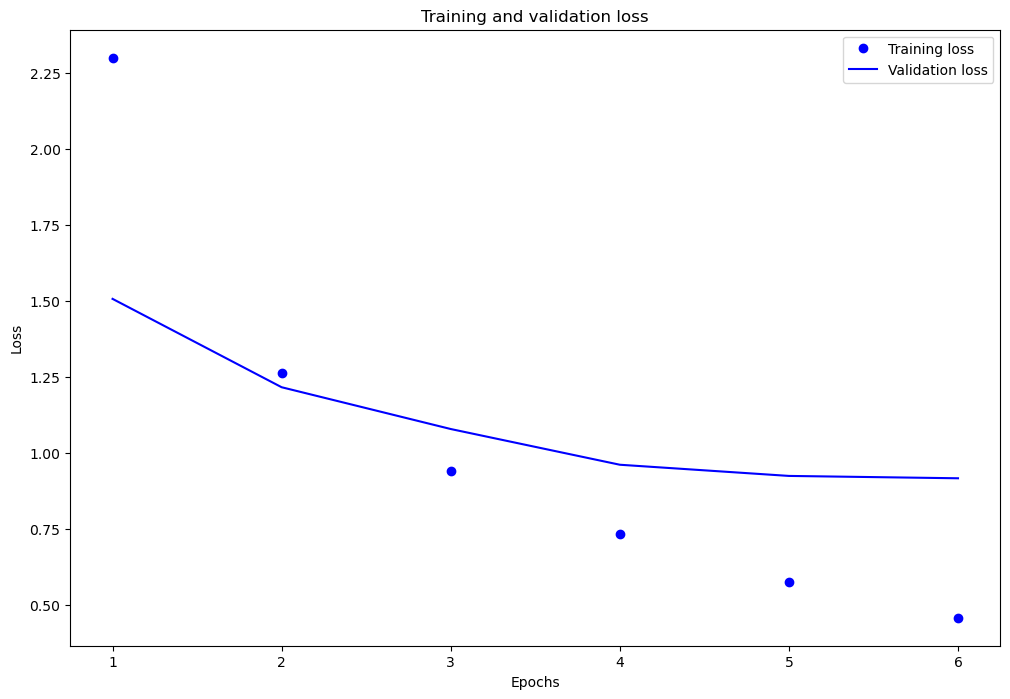

In [102]:
history_dict = history.history

# Get loss values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
# Plot
epochs = [i+1 for i in range(6)] # X label
fix, ax = plt.subplots(figsize = (12, 8))
ax.plot(epochs, loss_values, 'bo', label = 'Training loss')
ax.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax.set_title('Training and validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend();


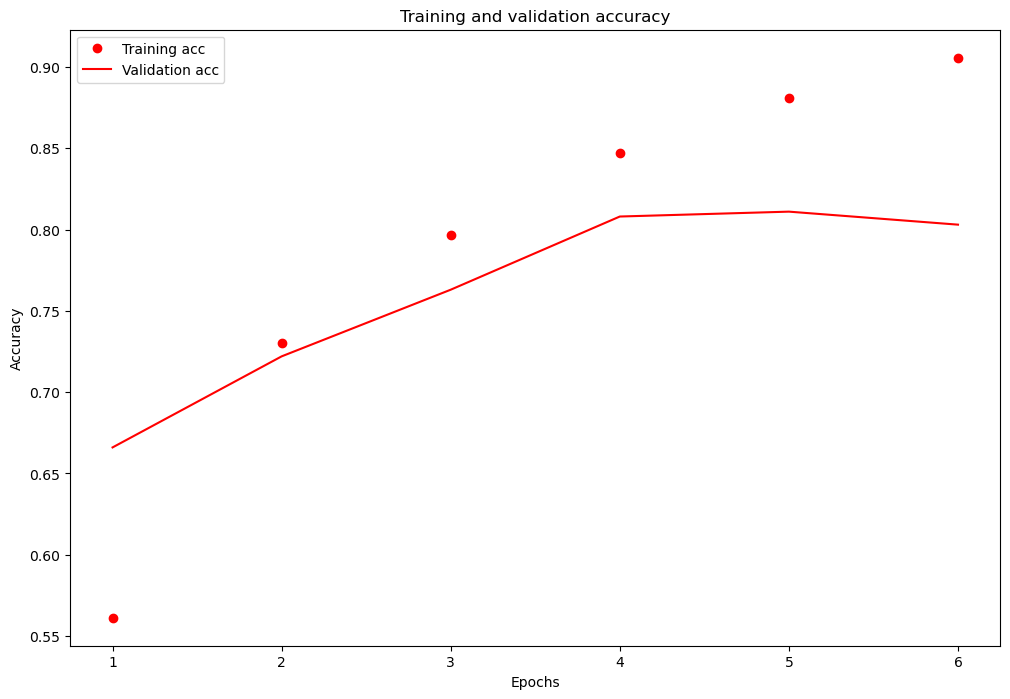

In [103]:
# Get loss values
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
# Plot
fix, ax = plt.subplots(figsize = (12, 8))
ax.plot(epochs, acc_values, 'ro', label = 'Training acc')
ax.plot(epochs, val_acc_values, 'r', label = 'Validation acc')
ax.set_title('Training and validation accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend();

In [104]:
# Model evaluation
results = model.evaluate(x_test, y_test)
print(f"Loss: {results[0]:.3f}")
print(f"Accuracy: {results[1]:.3f}")

71/71 [==============================] - 1s 10ms/step - loss: 0.9972 - accuracy: 0.7752
Loss: 0.997
Accuracy: 0.775


In [ ]:
# Prediction
predictions = model.predict(x_test)


## Regression

In [106]:
# Packages
# import numpy as np
# import matplotlib.pyplot as plt
# Dataset
from tensorflow.keras.datasets import boston_housing # Movie review classification

### EDA

In [107]:
# Load data
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
# Dataset information
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

57026/57026 [==============================] - 0s 0us/step
Training data shape: (404, 13)
Test data shape: (102, 13)


In [112]:
train_data[0, :]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [114]:
# Data preview
print(f"First data: {train_data[0, :]}\n")
print(f"Number of features: {len(train_data[0, :])}\n")
print(f"First target: USD {train_targets[0]} thousands")

First data: [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]

Number of features: 13

First target: USD 15.2 thousands


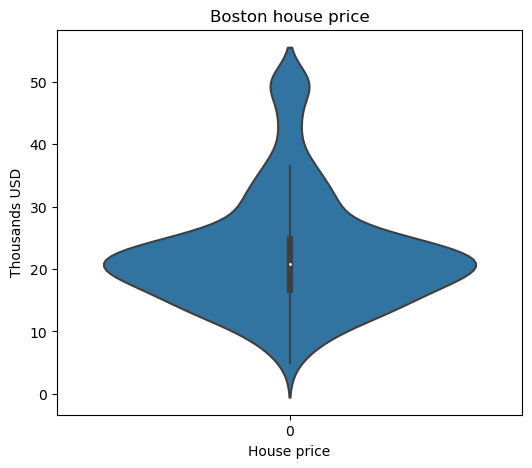

In [120]:
# See how our targets(house price) are distributed
# import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 5))
sns.violinplot(data = train_targets, ax = ax)
ax.set_title('Boston house price');
ax.set_xlabel('House price');
ax.set_ylabel('Thousands USD');

### Data preparation

In [121]:
# Since each numerical feature is in different scale, normalization (x-µ/std) is needed
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

# NOTE! Test data needed to use the mean & std from the training dataset to prevent data leak
test_data -= mean
test_data /= std

### Model Training

#### Define the model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [122]:
# Model structure
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation = 'relu'),
        layers.Dense(64, activation = 'relu'),
        # The output layer is just scalar without any activation function.
        # If activation function is applied, the output value would be confined by it.
        layers.Dense(1) 
    ])
    # Compile the model
    model.compile(
        optimizer = 'rmsprop',
        loss = 'mse', # Common for regression problem
        metrics = ['mae'] # Common for regression problem
    )
    return model

#### K-fold Cross Validation

In [123]:
# The amount of training data is not much, so it is not easy to split the validation set.
# Under this situation, K-fold cross validation can be helpful to lower the variance of the output.

# K-fold's K
k = 4
num_val_samples = len(train_data) // 4
num_epochs = 100
all_scores = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]
    ], axis=0)

    partial_train_targets = np.concatenate([
        train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]
    ], axis=0)

    model = build_model()

    model.fit(
        partial_train_data,
        partial_train_targets,
        epochs = num_epochs,
        batch_size = 16,
        verbose = 0
    )
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0


2023-11-27 21:20:38.102482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 21:20:52.606643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Processing fold #1


2023-11-27 21:20:53.094756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 21:21:05.946982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Processing fold #2


2023-11-27 21:21:06.160603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 21:21:19.615502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Processing fold #3


2023-11-27 21:21:19.840064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 21:21:32.539396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [124]:
all_scores

[5.189770221710205, 6.0925397872924805, 3.769810199737549, 4.035677433013916]

In [125]:
np.mean(all_scores)

4.771949410438538

In [127]:
# The result above is not that good, and we increase the number of epochs and find the best early stopping point
k = 4
num_val_samples = len(train_data) // 4
num_epochs = 500
all_mae_history = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]
    ], axis=0)

    partial_train_targets = np.concatenate([
        train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]
    ], axis=0)

    model = build_model()

    history = model.fit(
        partial_train_data,
        partial_train_targets,
        validation_data = (val_data, val_targets),
        epochs = num_epochs,
        batch_size = 1,
        verbose = 0
    )
    val_mae = history.history['val_mae']
    all_mae_history.append(val_mae)

Processing fold #0


2023-11-27 21:31:18.430555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 21:31:21.323771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Processing fold #1


2023-11-27 21:46:10.450973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 21:46:12.267961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Processing fold #2


2023-11-27 22:00:29.622761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 22:00:31.654424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Processing fold #3


2023-11-27 22:15:26.300148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-27 22:15:28.130814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [132]:
average_mae_history = [np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]

Text(0, 0.5, 'Validation MAE')

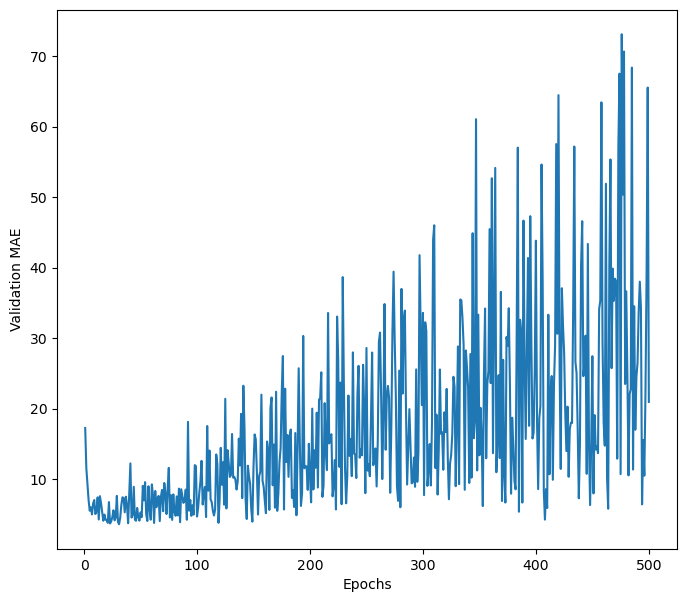

In [134]:
fig, ax = plt.subplots(figsize = (8, 7))
ax.plot(range(1, len(average_mae_history)+1), average_mae_history)
ax.set_xlabel('Epochs')
ax.set_ylabel('Validation MAE')

Text(0, 0.5, 'Validation MAE')

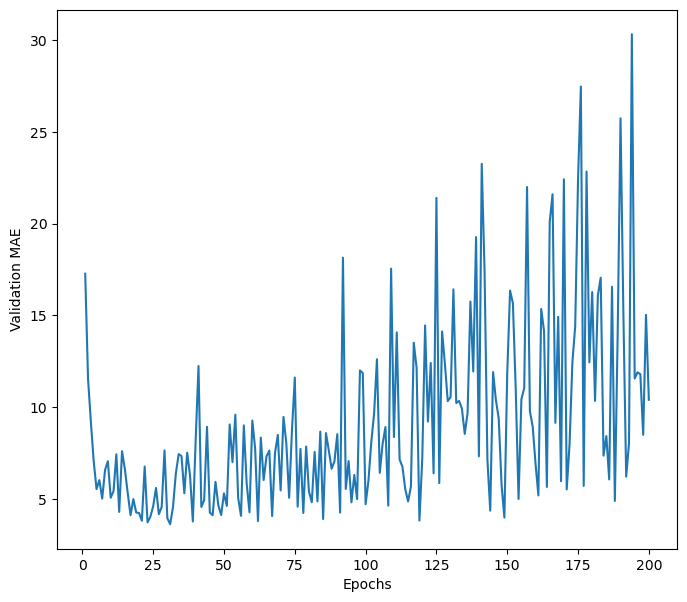

In [155]:
top_num = 200
fig, ax = plt.subplots(figsize = (8, 7))
ax.plot(range(1, top_num+1), average_mae_history[:top_num])
ax.set_xlabel('Epochs')
ax.set_ylabel('Validation MAE')

In [150]:
np.argmin(average_mae_history)

30

#### Training

In [151]:
model = build_model()
model.fit(
    train_data, train_targets,
    epochs = 50,
    batch_size = 16,
    verbose = 0)

test_mse, test_mae = model.evaluate(test_data, test_targets)
print(f'Test MSE: {test_mse:.3f}')
print(f'Test MAE: {test_mae:.3f}')

2023-11-28 21:37:25.145569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 12ms/step - loss: 20.2986 - mae: 3.5479
Test MSE: 20.299
Test MAE: 3.548


2023-11-28 21:37:34.381417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


#### Evaluation

In [152]:
# Prediction
predictions = model.predict(test_data)

4/4 [==============================] - 0s 4ms/step


2023-11-28 21:37:44.409095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [154]:
i = 0
print(f"Predicted: {predictions[i][0]:.3f}")
print(f"Actual: {test_targets[i]:.3f}")

Predicted: 5.615
Actual: 7.200


# Create Models by Keras

In [1]:
# Packages
from tensorflow import keras
from tensorflow.keras import layers

## Sequential Model

In [5]:
# Build a sequential model
# Method 1
model = keras.Sequential([
    layers.Dense(64, activation = 'relu', name = 'InputLayer'),
    layers.Dense(10, activation = 'softmax', name = 'OutputLayer')
], name='FirstModel')


In [ ]:
# Method 2
model = keras.Sequential()
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [6]:
# Use build() function to build the model
model.build(input_shape=(None, 3))
print(model.summary())

Model: "FirstModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 64)                256       
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [4]:
# The weights can be retrived after build
model.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-1.08771443e-01,  1.63652807e-01,  2.18940318e-01,
          1.49826109e-01, -2.58386016e-01, -1.43907130e-01,
         -1.99036986e-01, -3.55388820e-02,  5.64639270e-02,
         -1.92337185e-01, -1.33971572e-01, -1.67674810e-01,
          1.61990345e-01,  1.35371327e-01, -1.01422295e-01,
          1.22449994e-02,  2.20684946e-01,  1.44894868e-01,
         -1.47465497e-01,  2.20934868e-01, -9.96824950e-02,
         -7.62673318e-02,  1.52418435e-01,  1.37570977e-01,
          1.63461268e-02,  1.46767229e-01,  6.72676265e-02,
         -4.68883812e-02, -1.93949431e-01,  1.61088645e-01,
         -1.72329083e-01, -1.17363304e-01, -1.53008103e-02,
          1.13399535e-01, -2.53547072e-01,  2.40516901e-01,
          1.48187339e-01, -2.13973150e-01,  1.25776321e-01,
          1.74148738e-01,  1.57739103e-01,  1.90455407e-01,
         -2.43690997e-01,  1.37250483e-01,  2.74371743e-01,
         -2.97262490e-01,  3.6798

In [7]:
# Use keras.Input() class to declare input
model = keras.Sequential([
    keras.Input(shape=(3,)),
    layers.Dense(64, activation = 'relu', name = 'InputLayer'),
    layers.Dense(10, activation = 'softmax', name = 'OutputLayer')
], name='FirstModel')
# No need to call build() afterwards
print(model.summary())

Model: "FirstModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 64)                256       
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## Functional API

In [10]:
inputs = keras.Input(shape=(3,), name = 'Input')
features = layers.Dense(64, activation = 'relu', name = 'InputLayer')(inputs)
outputs = layers.Dense(10, activation = 'softmax', name = 'OutputLayer')(features)
model = keras.Model(inputs = inputs, outputs = outputs, name = 'SecondModel')
print(model.summary())

Model: "SecondModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 3)]               0         
                                                                 
 InputLayer (Dense)          (None, 64)                256       
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [9]:
features.shape

TensorShape([None, 64])

In [11]:
# Multi-input & output model
vocabulary_size = 10000
num_tags = 100
num_dept = 4

# Input layers
title = keras.Input(shape=(vocabulary_size,), name = 'title')
text_body = keras.Input(shape=(vocabulary_size,), name = 'text_body')
tags = keras.Input(shape=(num_tags,), name = 'tags')

# Concatenate different features as one tensor
features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation = 'relu')(features)

# Outputs
priority = (layers.Dense(1, activation = 'sigmoid', name = 'priority')(features))
dept = (layers.Dense(num_dept, activation = 'softmax', name = 'dept')(features))

model = keras.Model(inputs = [title, text_body, tags],
                    outputs = [priority, dept])

print(model.summary())


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 title (InputLayer)          [(None, 10000)]              0         []                            
                                                                                                  
 text_body (InputLayer)      [(None, 10000)]              0         []                            
                                                                                                  
 tags (InputLayer)           [(None, 100)]                0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 20100)                0         ['title[0][0]',               
                                                                     'text_body[0][0]',       

# Little Data Model Training

## First model from scratch

### Data preparation

In [13]:
# Only use little data to train a model

# Packages
import os, shutil
from pathlib import Path

# Training data
original_dir = Path.home() /'Desktop/dogs-vs-cats/train'
# New dir for selected data for training
new_base_dir = Path.home() /'Desktop/dogs-vs-cats/cats_vs_dogs_small'

def make_subset(subset_name, start_index, end_index):

    for category in ('cat', 'dog'):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        # Select training data
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        # Copy training data
        for fname in fnames:
            shutil.copyfile(src = original_dir / fname, dst = dir / fname)

# Training dataset
make_subset('train', start_index=0, end_index=1000)
# Validation dataset
make_subset('validation', start_index=1000, end_index=1500)
# Test dataset
make_subset('test', start_index=1500, end_index=2500)

### Model build

In [14]:
# Packages
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
inputs = keras.Input(shape = (180, 180, 3))
# Rescale the image data
x = layers.Rescaling(1./255)(inputs)
# CNN structure
x = keras.layers.Conv2D(filters = 32, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters = 64, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters = 128, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters = 256, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters = 256, kernel_size=3, activation='relu')(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs = inputs, outputs = outputs)
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

In [22]:
# Model Compile
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])

### Data preprocessing

In [17]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / 'train',
    image_size = (180, 180),
    batch_size = 32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / 'validation',
    image_size = (180, 180),
    batch_size = 32)
test_dataset = image_dataset_from_directory(
    new_base_dir / 'test',
    image_size = (180, 180),
    batch_size = 32)

train_dataset.prefetch(4)
validation_dataset.prefetch(4)
test_dataset.prefetch(4)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
# Training the model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convnet_from_scratch.keras_',
        save_best_only=True,
        monitor='val_loss')
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30


2023-12-10 16:02:03.053134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.7340 - accuracy: 0.5315

2023-12-10 16:02:07.256039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: convnet_from_scratch.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.keras_/assets


63/63 [==============================] - 6s 80ms/step - loss: 0.7340 - accuracy: 0.5315 - val_loss: 0.6863 - val_accuracy: 0.6030
Epoch 2/30
62/63 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5615INFO:tensorflow:Assets written to: convnet_from_scratch.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.keras_/assets


63/63 [==============================] - 5s 72ms/step - loss: 0.6913 - accuracy: 0.5625 - val_loss: 0.6623 - val_accuracy: 0.5980
Epoch 3/30
62/63 [============================>.] - ETA: 0s - loss: 0.6899 - accuracy: 0.5948INFO:tensorflow:Assets written to: convnet_from_scratch.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.keras_/assets


63/63 [==============================] - 5s 72ms/step - loss: 0.6897 - accuracy: 0.5940 - val_loss: 0.6521 - val_accuracy: 0.5820
Epoch 4/30
63/63 [==============================] - 4s 67ms/step - loss: 0.6266 - accuracy: 0.6515 - val_loss: 0.9419 - val_accuracy: 0.5840
Epoch 5/30
62/63 [============================>.] - ETA: 0s - loss: 0.6101 - accuracy: 0.6744INFO:tensorflow:Assets written to: convnet_from_scratch.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.keras_/assets


63/63 [==============================] - 5s 74ms/step - loss: 0.6089 - accuracy: 0.6745 - val_loss: 0.6389 - val_accuracy: 0.6650
Epoch 6/30
63/63 [==============================] - 4s 67ms/step - loss: 0.5900 - accuracy: 0.6870 - val_loss: 0.9732 - val_accuracy: 0.5870
Epoch 7/30
62/63 [============================>.] - ETA: 0s - loss: 0.5389 - accuracy: 0.7198INFO:tensorflow:Assets written to: convnet_from_scratch.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.keras_/assets


63/63 [==============================] - 5s 73ms/step - loss: 0.5394 - accuracy: 0.7200 - val_loss: 0.5718 - val_accuracy: 0.7070
Epoch 8/30
63/63 [==============================] - 4s 66ms/step - loss: 0.5058 - accuracy: 0.7520 - val_loss: 0.9807 - val_accuracy: 0.6450
Epoch 9/30
63/63 [==============================] - 4s 66ms/step - loss: 0.4737 - accuracy: 0.7700 - val_loss: 0.6237 - val_accuracy: 0.6750
Epoch 10/30
63/63 [==============================] - 4s 66ms/step - loss: 0.4357 - accuracy: 0.8000 - val_loss: 0.6674 - val_accuracy: 0.6810
Epoch 11/30
63/63 [==============================] - 4s 66ms/step - loss: 0.3893 - accuracy: 0.8310 - val_loss: 0.8350 - val_accuracy: 0.6900
Epoch 12/30
63/63 [==============================] - 4s 66ms/step - loss: 0.3285 - accuracy: 0.8570 - val_loss: 1.0728 - val_accuracy: 0.6330
Epoch 13/30
63/63 [==============================] - 4s 67ms/step - loss: 0.2827 - accuracy: 0.8770 - val_loss: 0.8668 - val_accuracy: 0.7050
Epoch 14/30
63/63 [=

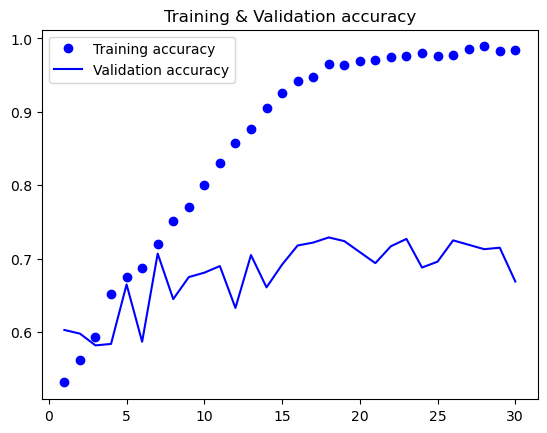

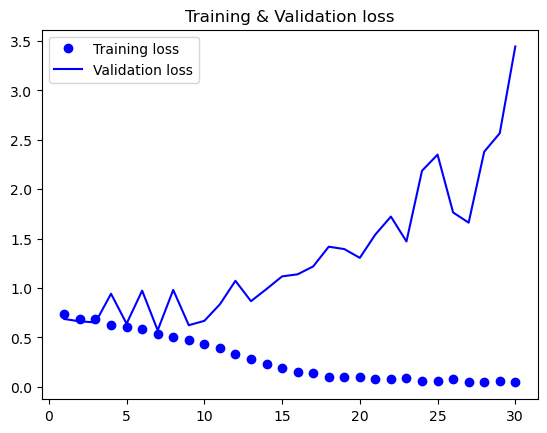

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training & Validation accuracy')
plt.legend()
plt.figure();
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training & Validation loss')
plt.legend()
plt.figure();

In [26]:
test_model = keras.models.load_model('convnet_from_scratch.keras_')

test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

 1/63 [..............................] - ETA: 13s - loss: 0.7210 - accuracy: 0.5938

2023-12-10 16:09:50.246856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 2s 25ms/step - loss: 0.6191 - accuracy: 0.6930
Test accuracy: 0.693


## Apply Data Augmentation

In [27]:
# Apply data augmentation techniques
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal'), # 50% chance flip the image
    keras.layers.RandomRotation(.1), # Rotate the image in the range [-10%, +10%]
    keras.layers.RandomZoom(.2) # Zoom in or out the image in the range [-20%, +20%]
])

2023-12-10 16:19:32.242765: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-10 16:19:32.796846: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-10 16:19:32.846073: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-10 16:19:32.896887: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-10 16:19:32.947769: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-12-10 16:19:33.000372: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

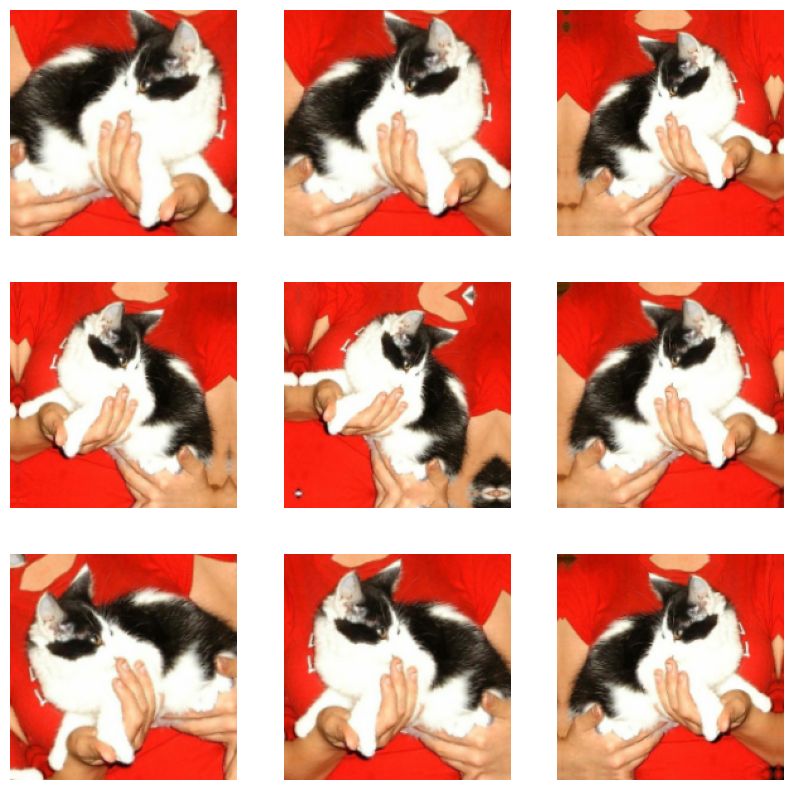

In [28]:
# Show the results
plt.figure(figsize=(10, 10))

for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')

In [29]:
## Model2 add data_augmentation and dropout
inputs = keras.Input(shape = (180, 180, 3))
# Apply data augmentation
x = data_augmentation(inputs)
# Rescale the image data
x = layers.Rescaling(1./255)(inputs)
# CNN structure
x = keras.layers.Conv2D(filters = 32, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters = 64, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters = 128, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters = 256, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters = 256, kernel_size=3, activation='relu')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(.5)(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs = inputs, outputs = outputs)
# Model Compile
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])
print(model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

In [30]:
# Training the model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convnet_from_scratch_with_augmentation.keras_',
        save_best_only=True,
        monitor='val_loss')
]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/100


2023-12-10 16:24:11.046462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.8578 - accuracy: 0.5030

2023-12-10 16:24:15.299992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


63/63 [==============================] - 6s 82ms/step - loss: 0.8578 - accuracy: 0.5030 - val_loss: 0.6919 - val_accuracy: 0.5070
Epoch 2/100
63/63 [==============================] - ETA: 0s - loss: 0.6960 - accuracy: 0.5215INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


63/63 [==============================] - 5s 77ms/step - loss: 0.6960 - accuracy: 0.5215 - val_loss: 0.6811 - val_accuracy: 0.5140
Epoch 3/100
63/63 [==============================] - 4s 67ms/step - loss: 0.6871 - accuracy: 0.5720 - val_loss: 0.7289 - val_accuracy: 0.5110
Epoch 4/100
62/63 [============================>.] - ETA: 0s - loss: 0.6532 - accuracy: 0.6164INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


63/63 [==============================] - 5s 73ms/step - loss: 0.6528 - accuracy: 0.6175 - val_loss: 0.6759 - val_accuracy: 0.6050
Epoch 5/100
62/63 [============================>.] - ETA: 0s - loss: 0.6203 - accuracy: 0.6633INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


63/63 [==============================] - 5s 76ms/step - loss: 0.6195 - accuracy: 0.6645 - val_loss: 0.5973 - val_accuracy: 0.6760
Epoch 6/100
62/63 [============================>.] - ETA: 0s - loss: 0.5941 - accuracy: 0.6875INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


63/63 [==============================] - 5s 73ms/step - loss: 0.5972 - accuracy: 0.6855 - val_loss: 0.5881 - val_accuracy: 0.6810
Epoch 7/100
63/63 [==============================] - 4s 67ms/step - loss: 0.5688 - accuracy: 0.7110 - val_loss: 0.6048 - val_accuracy: 0.6650
Epoch 8/100
63/63 [==============================] - 4s 67ms/step - loss: 0.5446 - accuracy: 0.7230 - val_loss: 0.5914 - val_accuracy: 0.6830
Epoch 9/100
62/63 [============================>.] - ETA: 0s - loss: 0.5007 - accuracy: 0.7480INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


63/63 [==============================] - 5s 73ms/step - loss: 0.4998 - accuracy: 0.7485 - val_loss: 0.5879 - val_accuracy: 0.6900
Epoch 10/100
62/63 [============================>.] - ETA: 0s - loss: 0.4788 - accuracy: 0.7767INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.keras_/assets


63/63 [==============================] - 5s 78ms/step - loss: 0.4776 - accuracy: 0.7770 - val_loss: 0.5759 - val_accuracy: 0.7080
Epoch 11/100
63/63 [==============================] - 4s 68ms/step - loss: 0.4242 - accuracy: 0.8010 - val_loss: 0.6581 - val_accuracy: 0.6840
Epoch 12/100
63/63 [==============================] - 4s 68ms/step - loss: 0.3937 - accuracy: 0.8240 - val_loss: 0.6926 - val_accuracy: 0.7060
Epoch 13/100
63/63 [==============================] - 4s 67ms/step - loss: 0.3547 - accuracy: 0.8455 - val_loss: 0.6131 - val_accuracy: 0.7150
Epoch 14/100
63/63 [==============================] - 4s 67ms/step - loss: 0.3084 - accuracy: 0.8655 - val_loss: 0.7132 - val_accuracy: 0.7410
Epoch 15/100
63/63 [==============================] - 4s 69ms/step - loss: 0.2772 - accuracy: 0.8800 - val_loss: 0.6882 - val_accuracy: 0.7480
Epoch 16/100
63/63 [==============================] - 4s 66ms/step - loss: 0.2225 - accuracy: 0.9100 - val_loss: 0.6780 - val_accuracy: 0.7210
Epoch 17/100

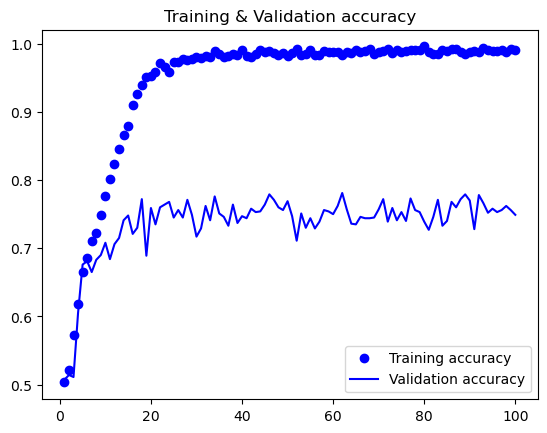

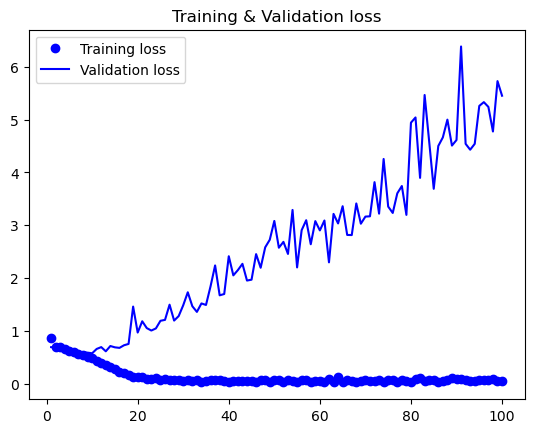

<Figure size 640x480 with 0 Axes>

In [31]:

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training & Validation accuracy')
plt.legend()
plt.figure();
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training & Validation loss')
plt.legend()
plt.figure();